In [ ]:
#import libraries
import argparse
import os
import numpy as np
import math
import sys

import torchvision.transforms as transforms
from torchvision.utils import save_image
import torchvision
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
from torchvision.utils import make_grid

import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt

[[[ 4.11259331 -0.05846916]
  [ 4.00491029 -0.11190888]
  [ 4.02809492  0.12690425]
  ...
  [ 4.08530602  0.19166375]
  [ 3.8183214   0.12068419]
  [ 3.99683974  0.07209196]]

 [[ 3.09803418  2.43392668]
  [ 3.12339639  2.2049879 ]
  [ 3.26998284  2.46616139]
  ...
  [ 3.21146222  2.26107454]
  [ 3.21804323  2.50851182]
  [ 3.45173416  2.37616209]]

 [[ 1.50331209  3.70641451]
  [ 1.31561549  3.73212008]
  [ 1.28074771  3.79325741]
  ...
  [ 1.18420334  3.74614213]
  [ 1.10730326  3.83109883]
  [ 1.36349366  3.90013664]]

 ...

 [[-1.11503447 -3.74704346]
  [-1.09661252 -3.67196825]
  [-1.33528602 -3.746759  ]
  ...
  [-1.02108615 -3.67838667]
  [-1.15435029 -3.78676359]
  [-1.16360917 -3.88555023]]

 [[ 1.14009682 -3.76456707]
  [ 1.40130983 -3.84871096]
  [ 1.2410889  -3.85760555]
  ...
  [ 1.15393262 -3.88768438]
  [ 1.28149834 -3.83163849]
  [ 1.15934224 -3.77264448]]

 [[ 3.31788175 -2.29675445]
  [ 3.39078988 -2.47547075]
  [ 3.40625027 -2.47564521]
  ...
  [ 3.19978229 -2.390386

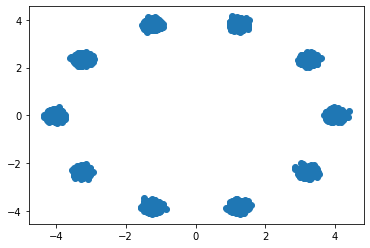

In [ ]:
def generate_2dgaussians(radius, N=10, num_data=1000, std=.1, origin=(0,0), tensor=False, seed=None):
    """Generates 2-dimensional Gaussians on a ring with given number of data points and dimensionality.
    Means of the Gaussians are located on the circle with given radius around the origin.

    Parameters
    ----------
        radius : {int, float}
            radius of the circle around the origin
        N : int
            number of Gaussians to generate, default is 10
        num_data : int
            number of data points to be generated for each Gaussian, default is 1000
        std : {int, float, numpy.ndarray}
            standard deviation of the Gaussians, can be float or ndarray,
            if float, all Gaussians have the same std,
            if ndarray, Gaussians have their own std, must have dim N
            default is 1.
        origin : array_like
            origin of the circle, default is (0,0)
        tensor : bool
            if True, output is a torch.tensor instead of numpy.ndarray, default is False
        seed : {None, int, array_like[ints], SeedSequence, BitGenerator, Generator}, optional
            seed for the RNG for repeating experiments, default is None
    Output
    ------
        gaussians : {numpy.ndarray, torch.tensor}
            ndarray/tensor of shape (N, num_data, 2)
    """
    # check types of inputs
    if type(std) is float or type(std) is int:
        std = np.full((N, 2), float(std))
    elif type(std) is not np.ndarray:
        raise ValueError("Parameter 'std' is not int, float or np.ndarray")

    if type(radius) is not float:
        if type(radius) is not int:
            raise ValueError("Parameter 'radius' is not float or int")
        radius = float(radius)

    # define variables
    dim = 2
    gaussians = np.zeros((N, num_data, dim))
    origin = np.array(origin)
    centers = np.zeros((N, dim))
    rng = np.random.default_rng(seed)

    # calculate Gaussian centers on circle and generate data for each
    for i in range(N):
        centers[i,0] = radius * np.cos((i*2*np.pi)/N) + origin[0]
        centers[i,1] = radius * np.sin((i*2*np.pi)/N) + origin[1]
        # generate num_data points for each of the Gaussians
        data = rng.normal(centers[i], std[i], (num_data, dim))
        gaussians[i] = data

    # return torch.Tensor instead of numpy.ndarray if desired
    if tensor:
        gaussians = torch.from_numpy(gaussians)
    return gaussians


ring_data = generate_2dgaussians(4)
print(ring_data)
print(np.shape(ring_data)) 
    
    
print(len(ring_data))

plt.scatter(ring_data[:,:,0],ring_data[:,:,1])
print(ring_data[0]) 


In [ ]:
latent_size = 16

# Discriminator
D = nn.Sequential(
    nn.Linear(2, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid())
   

# Generator 
G = nn.Sequential(
    nn.Linear(latent_size, 32),
    nn.Tanh(),
    nn.Linear(32, 32),
    nn.Tanh(),
    nn.Linear(32, 32),
    nn.Tanh(),
    nn.Linear(32, 2))

In [ ]:

real_data = torch.FloatTensor(ring_data)

dis = D(real_data)

In [ ]:

latent_size = 16

noise = torch.randn(1000, latent_size)
noise.shape
gen = G(noise)

In [ ]:
loss_func = nn.MSELoss()
d_optimizer = torch.optim.Adam(D.parameters(),0.0002)
g_optimizer = torch.optim.Adam(G.parameters(),0.0002)

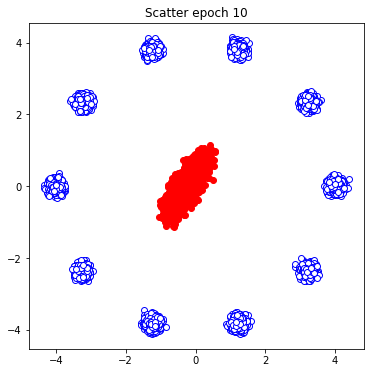

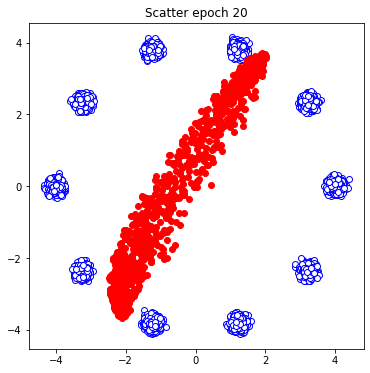

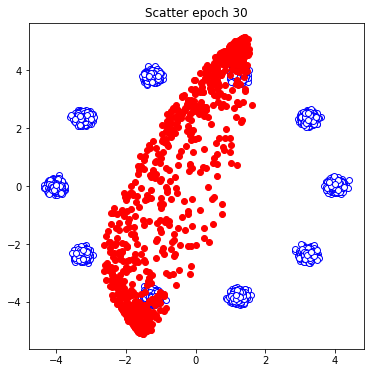

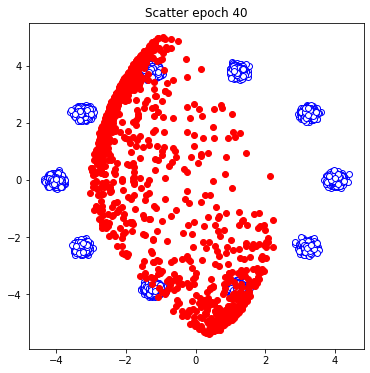

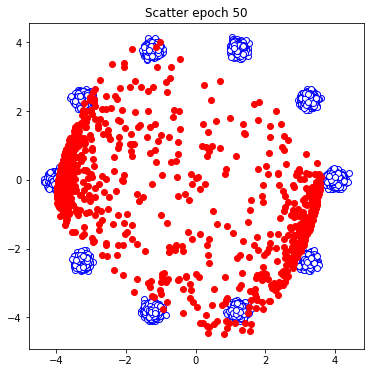

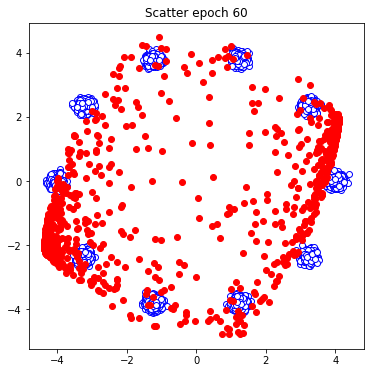

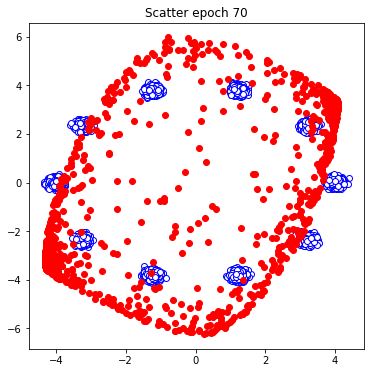

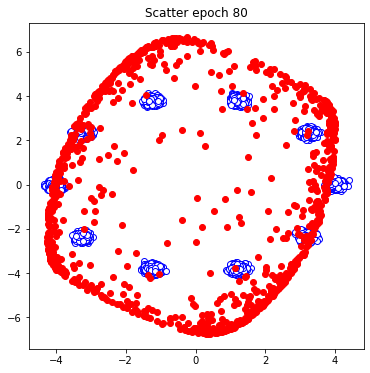

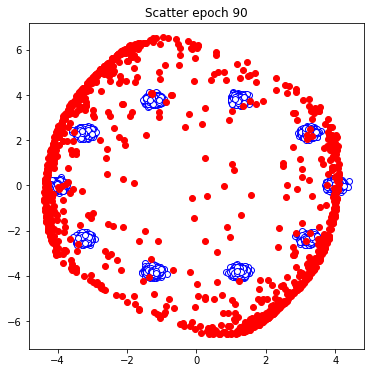

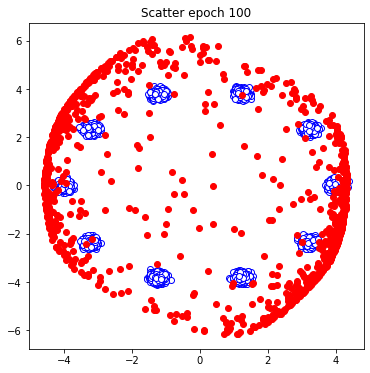

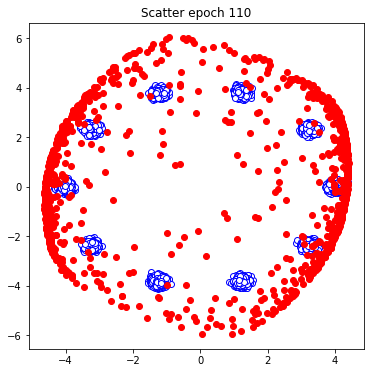

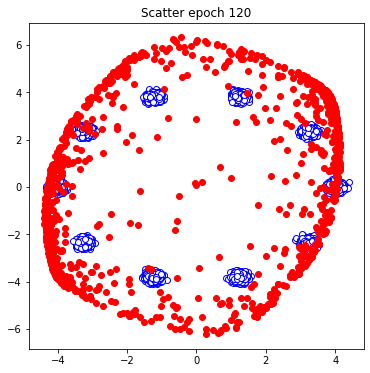

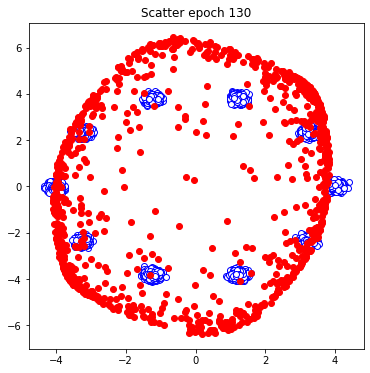

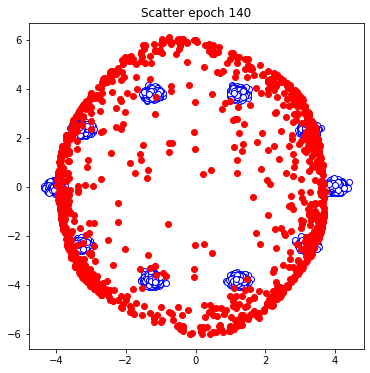

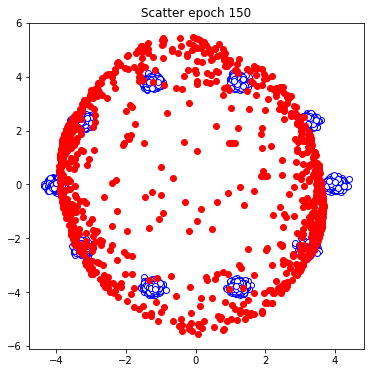

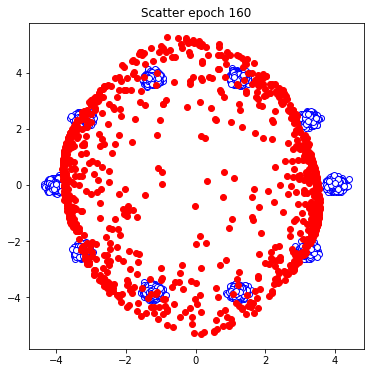

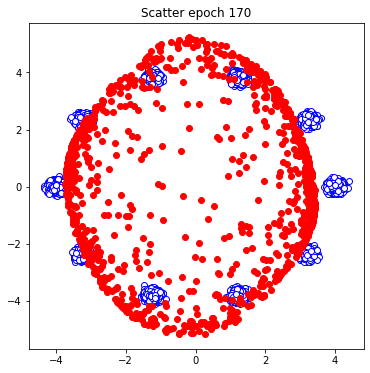

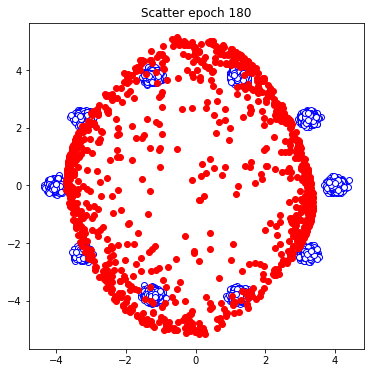

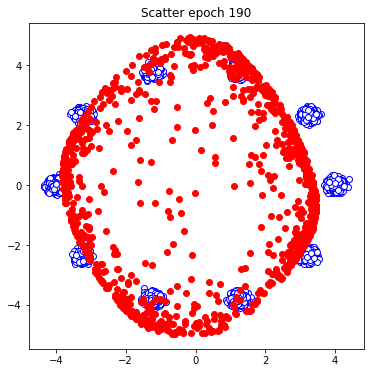

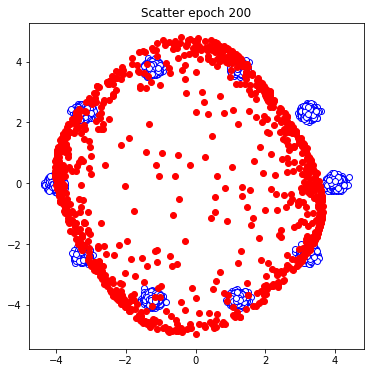

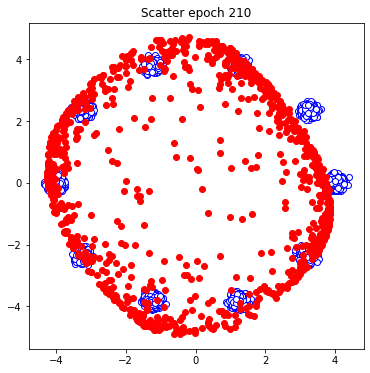

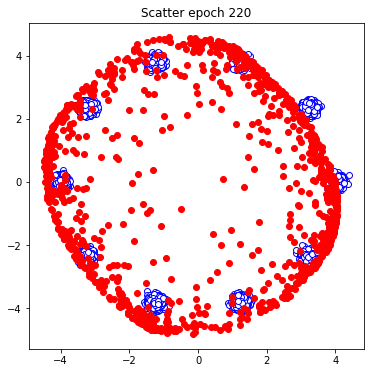

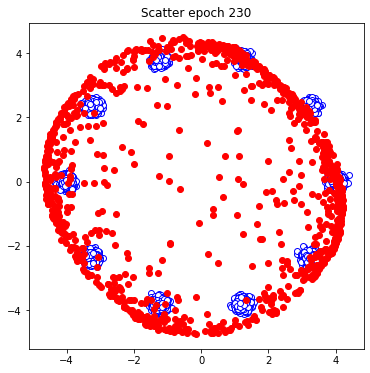

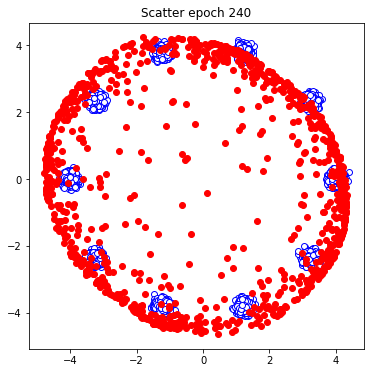

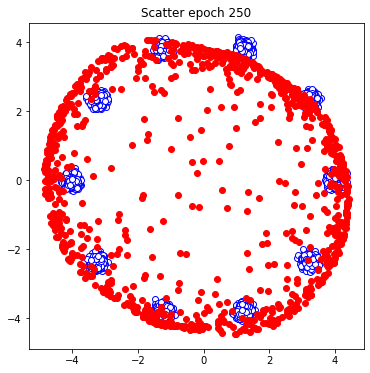

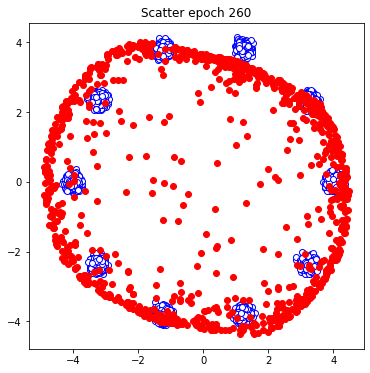

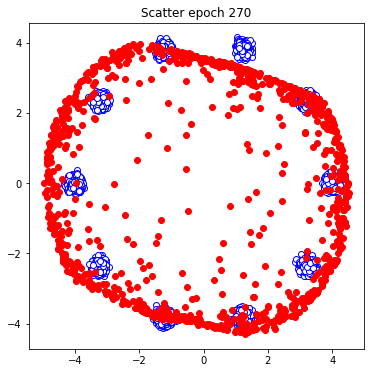

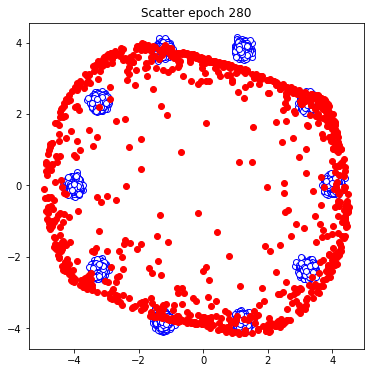

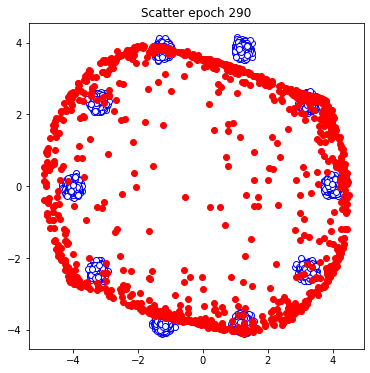

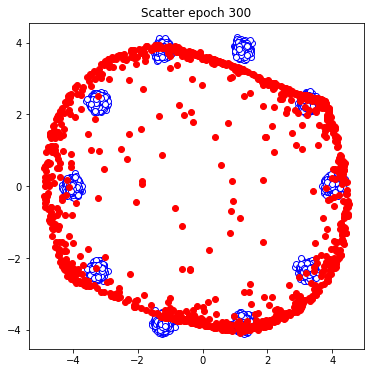

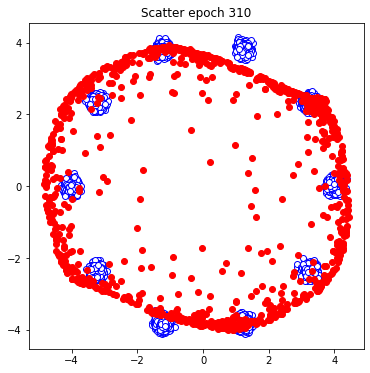

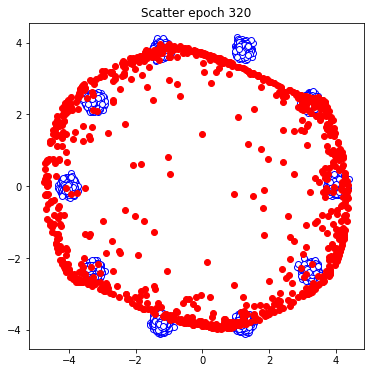

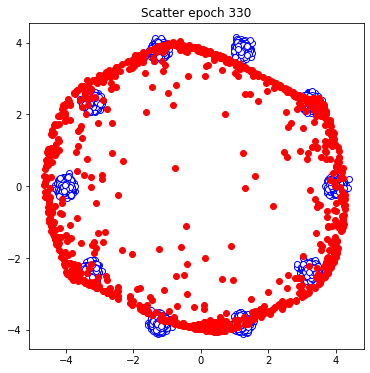

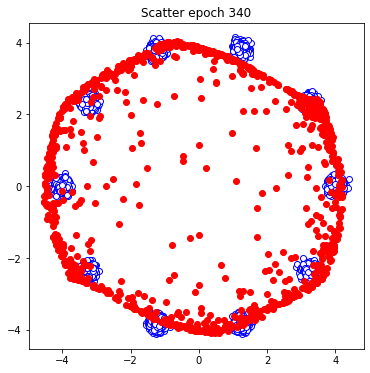

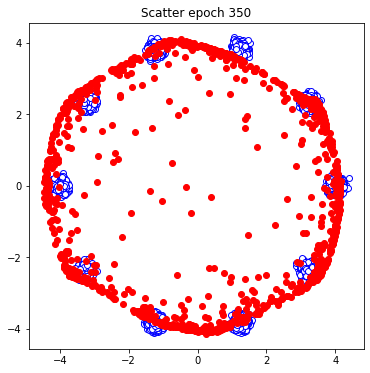

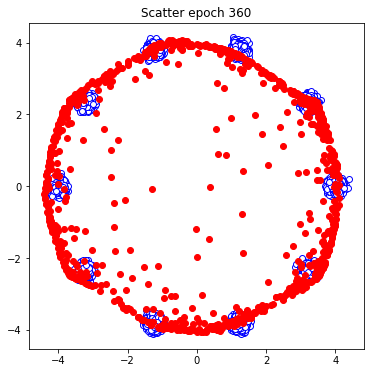

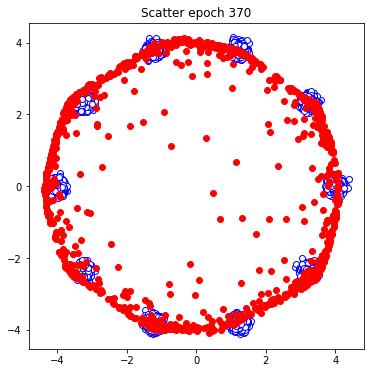

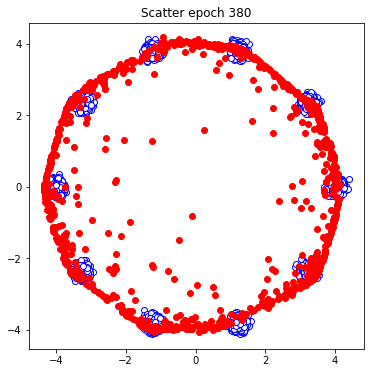

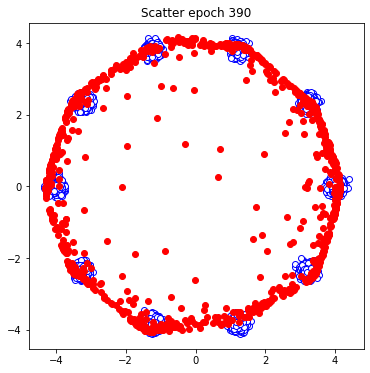

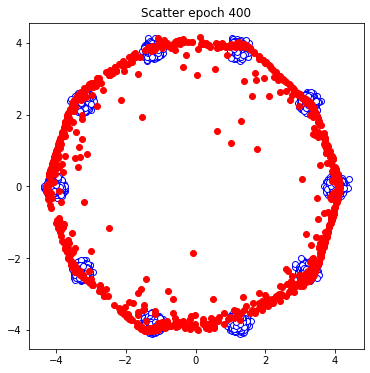

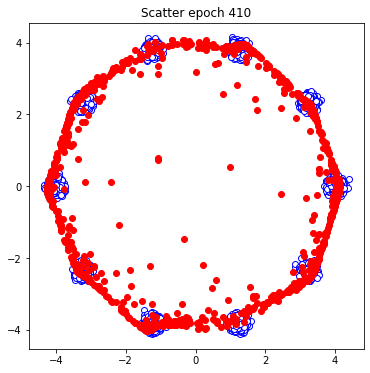

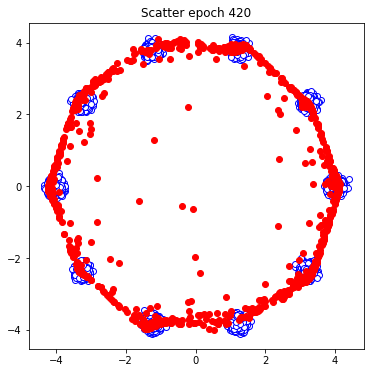

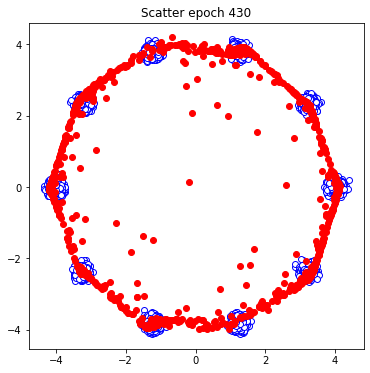

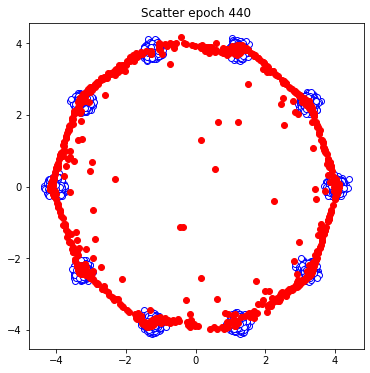

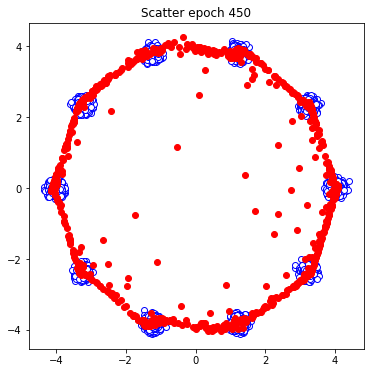

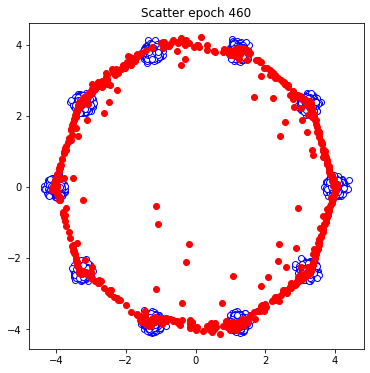

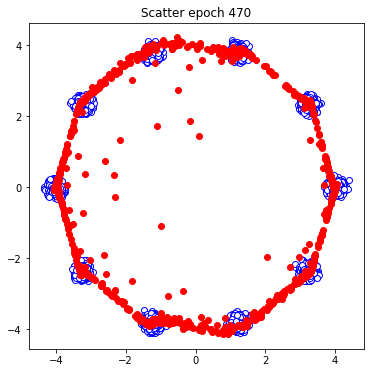

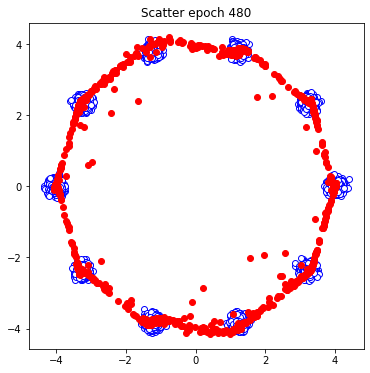

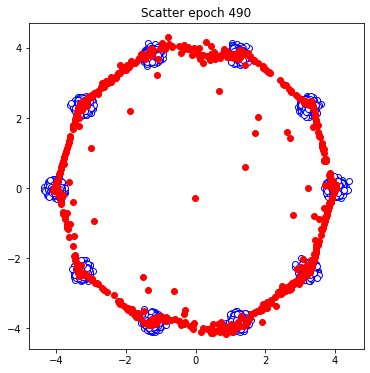

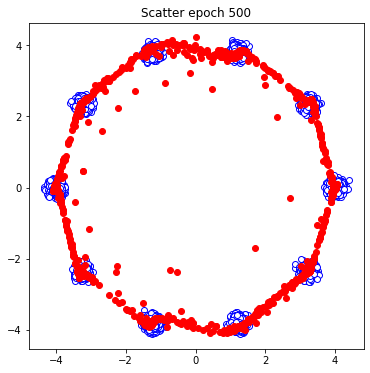

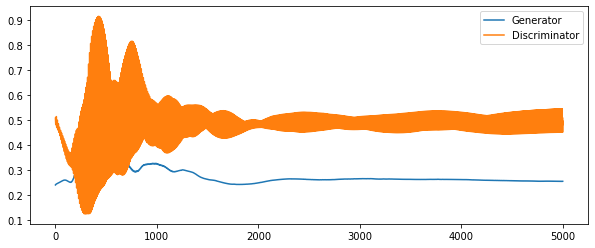

In [ ]:
# Start training
g_losses = []
d_losses = []

#real = real_data
noise = torch.randn(1000, latent_size)
fake = noise
num_epochs = 500
batch_size = 500

for epoch in range(num_epochs):

    for i in range(real_data.shape[0]):
        #print(real_data[i])
        #print(len(real_data[i]))
        #outputs = D(real_data[i])
        #print(outputs)
        real_labels = torch.ones(len(real_data[i]), 1)
        fake_labels = torch.zeros(len(real_data[i]), 1)
        #print(real_labels)
        #print(len(real_labels))
      
        # Calculate BCEloss for real data
        outputs = D(real_data[i])
        #print(len(outputs))
        d_loss_real = loss_func(outputs, real_labels)
        # Calculate BCEloss for fake data
        #z = torch.randn(batch_size, latent_size)

        fake_data = G(fake)
        outputs = D(fake_data)
        d_loss_fake = loss_func(outputs, fake_labels)
        
        # Train, only train the classifier
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        d_losses.append(d_loss.item())
        
        z = torch.randn(batch_size, latent_size)
        fake_data = G(fake)
        outputs = D(fake_data)
        # Here let the generator learn to move the loss function towards the side of the true sample
        g_loss = loss_func(outputs, real_labels)
        
        g_losses.append(g_loss.item())
        
        # Training generator
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
    
    
    if (epoch+1)%10==0:
        # Generate some fake data points from the generator sample
        z = torch.randn(1000, latent_size)
        with torch.no_grad():
            fake_data = G(z)
        fake_x,fake_y = fake_data[:,0].numpy(),fake_data[:,1].numpy()
        real_x,real_y = real_data[:,:,0].numpy(),real_data[:,:,1].numpy()

        step = 0.02
        x = np.arange(-2,2,step)
        y = np.arange(-2,2,step)

        #Turn the original data into grid data form
        X,Y = np.meshgrid(x,y)
        n,m = X.shape
        #Write function, z is uppercase

        inputs = torch.stack([torch.FloatTensor(X),torch.FloatTensor(Y)])
        inputs = inputs.permute(1,2,0)
        inputs = inputs.reshape(-1,2)
        with torch.no_grad():
            Z = D(inputs)
        Z = Z.numpy().reshape(n,m)
        
        #plt.figure(figsize=(7,6))
        #plt.title('Discriminator probablity')
        #cset = plt.contourf(X,Y,Z,100)
        #plt.colorbar(cset)
        #plt.show()
        
        plt.figure(figsize=(6,6))

        plt.scatter(real_x,real_y,c = 'w', edgecolor='b')
        plt.scatter(fake_x,fake_y,c = 'r')
        plt.title('Scatter epoch %d'%(epoch+1))
        #contour = plt.contour(X,Y,Z,1)
        #plt.clabel(contour,colors='k')
        plt.show()
        
plt.figure(figsize=(10,4))
plt.plot(g_losses,label='Generator')
plt.plot(d_losses,label='Discriminator')
plt.legend()

        
